Vorbereitung der benötigten Bibliotheken

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import & Überprüfung der der Daten

In [13]:
# Datei einlesen
df = pd.read_csv('ogd115_gest_bilanz.csv')

# Daten überprüfen
print(df.head())


   Jahr           Rubrik Energietraeger        TJ
0  1980  Bruttoverbrauch   Elektrizität  -29450.0
1  1980  Bruttoverbrauch  Erdölprodukte  321250.0
2  1980  Bruttoverbrauch      Fernwärme       0.0
3  1980  Bruttoverbrauch            Gas   36280.0
4  1980  Bruttoverbrauch    Holzenergie   26280.0


Als erstes möchten wir sehen, wie sich der allgemeine Verbrauch je Energieträger verändert hat.

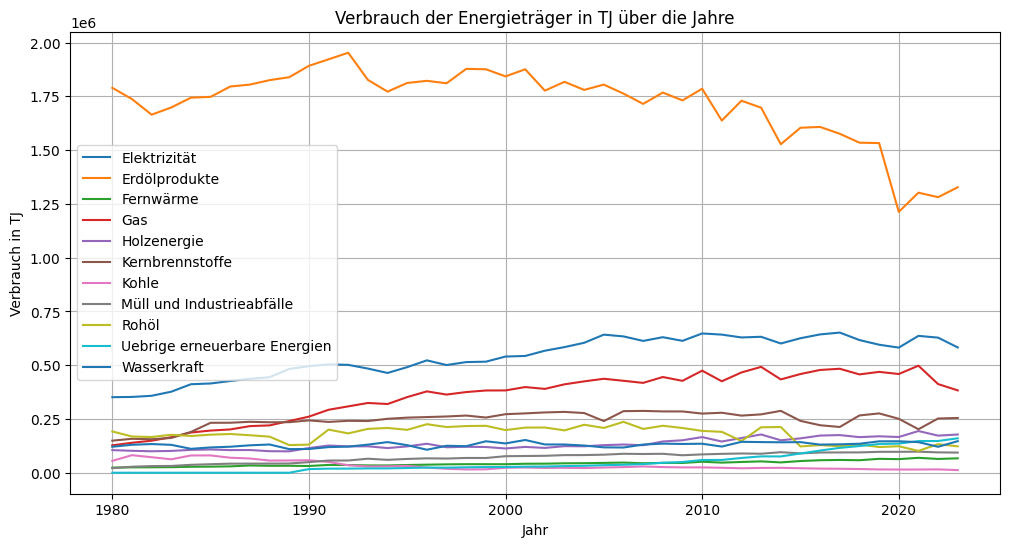

In [19]:
# Daten filtern und vorbereiten
df_filtered = df[df['Energietraeger'].isin(['Elektrizität','Erdölprodukte','Fernwärme','Gas','Holzenergie','Kernbrennstoffe','Kohle','Müll und Industrieabfälle','Rohöl','Uebrige erneuerbare Energien','Wasserkraft'])]
df_filtered = df_filtered.groupby(['Jahr', 'Energietraeger'])['TJ'].sum().reset_index()
df_pivot = df_filtered.pivot(index='Jahr', columns='Energietraeger', values='TJ')

# Plot erstellen
plt.figure(figsize=(12, 6))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)

plt.xlabel('Jahr')
plt.ylabel('Verbrauch in TJ')
plt.title('Verbrauch der Energieträger in TJ über die Jahre')
plt.legend()
plt.grid(True)
plt.show()
